<a href="https://colab.research.google.com/github/anushChrist/ML_LAB/blob/main/2348504_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [87]:
data=pd.read_csv('/content/employee_data (1) 2.csv')


In [88]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [89]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [90]:
data['filed_complaint'].fillna(0,inplace=True)
data['recently_promoted'].fillna(0,inplace=True)
data['department'].fillna(data['department'].mode()[0],inplace=True)
data['last_evaluation'].fillna(data['last_evaluation'].mean(),inplace=True)
data['satisfaction'].fillna(data['satisfaction'].mean(),inplace=True)
data['tenure'].fillna(data['tenure'].mean(),inplace=True)

In [91]:
data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [92]:
data.dtypes


avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

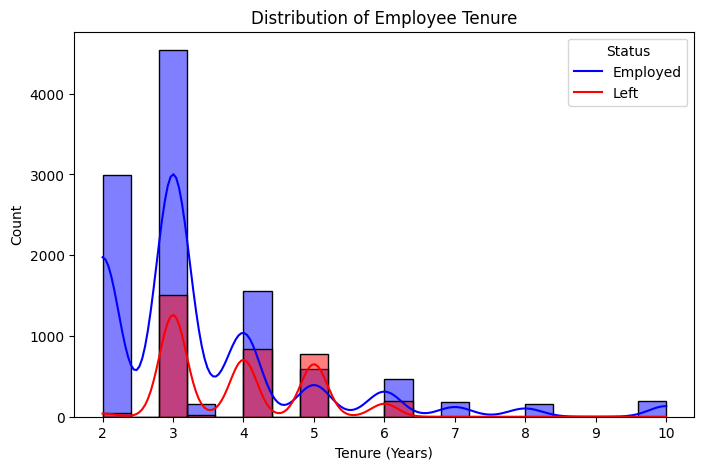

In [109]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='tenure', hue='status', bins=20, kde=True, palette={"Employed": "blue", "Left": "red"})
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.title('Distribution of Employee Tenure')
plt.legend(title='Status', labels=['Employed', 'Left'])
plt.show()

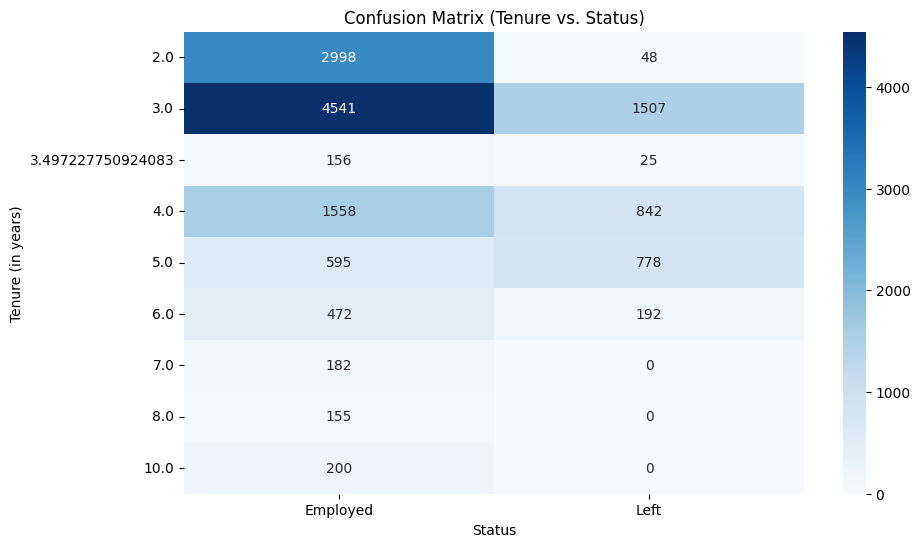

In [94]:
crosstab = pd.crosstab(data['tenure'], data['status'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Tenure vs. Status)')
plt.xlabel('Status')
plt.ylabel('Tenure (in years)')

plt.show()

 Employees who left the company have tenure of less than or equal to 6 years with the largest attrition rate bein observed at 3 years in the company

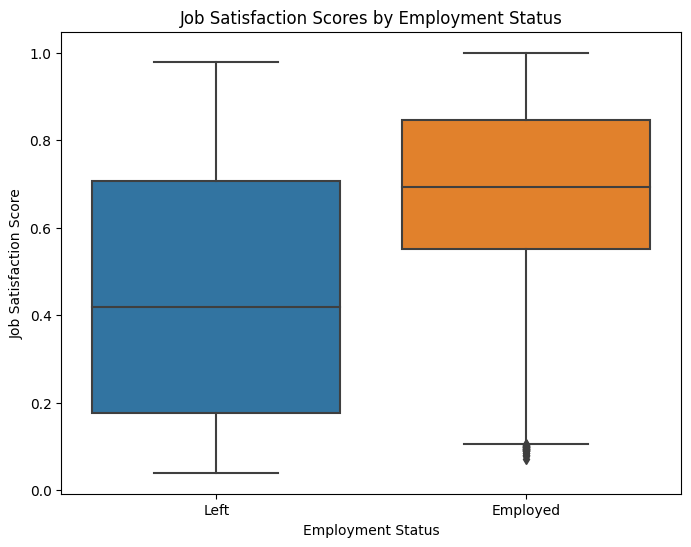

In [95]:
left_employees = data[data['status'] == 'Left']
employed_employees = data[data['status'] == 'Employed']

plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='satisfaction', data=pd.concat([left_employees, employed_employees]))
plt.title('Job Satisfaction Scores by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.show()

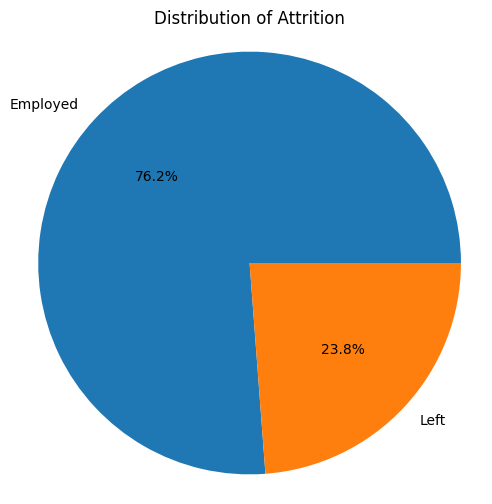

In [96]:
attrition_counts = data['status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Attrition')
plt.axis('equal')
plt.show()

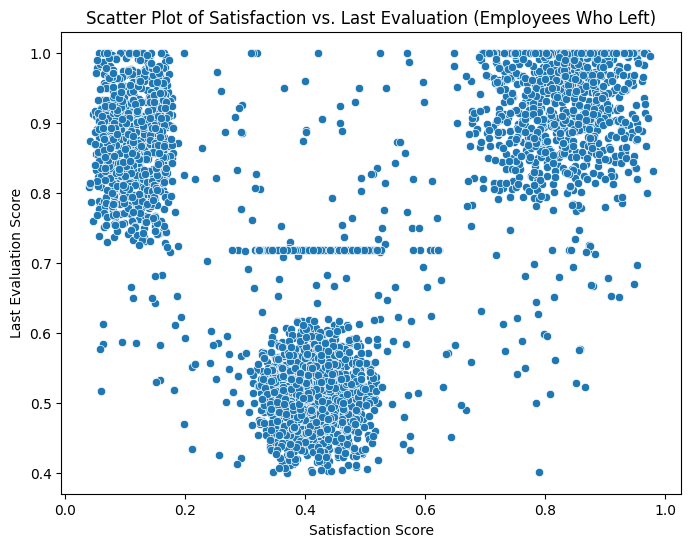

In [97]:
left_employees = data[data['status'] == 'Left']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_employees)
plt.title('Scatter Plot of Satisfaction vs. Last Evaluation (Employees Who Left)')
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.show()

In [98]:
X = data[['tenure', 'satisfaction', 'n_projects']]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


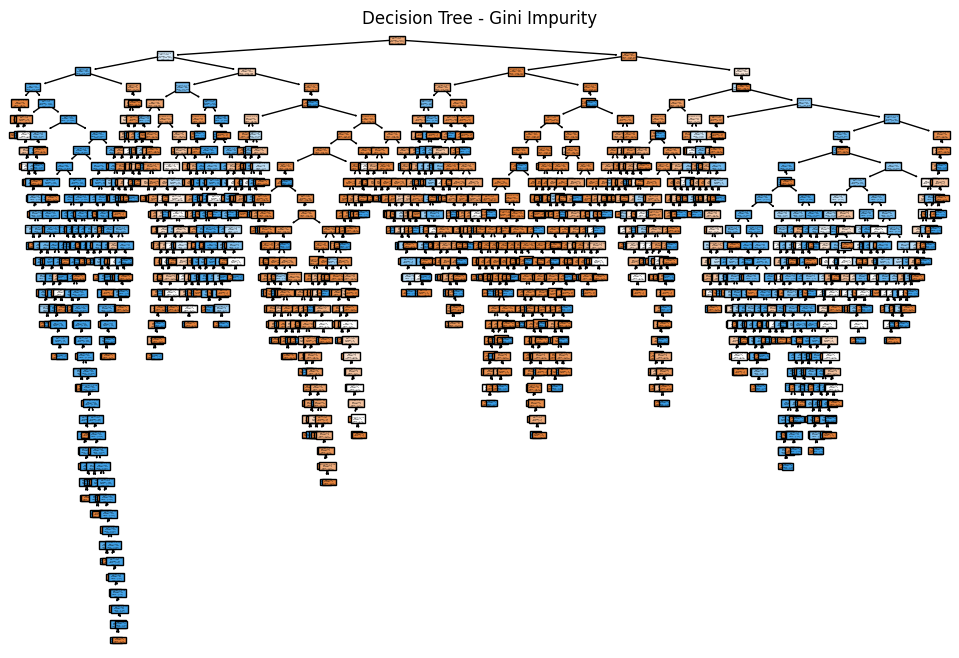

In [99]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Gini Impurity')
plt.show()

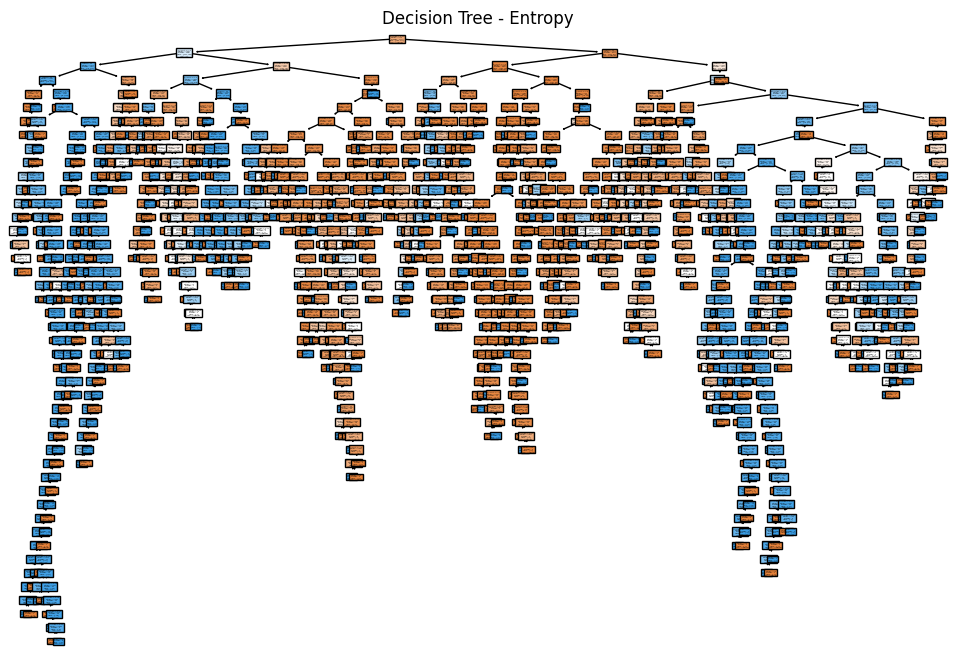

In [100]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['Employed','Left'])
plt.title('Decision Tree - Entropy')
plt.show()

In [101]:
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Left')
    recall = recall_score(y_test, y_pred, pos_label='Left')
    f1 = f1_score(y_test, y_pred, pos_label='Left')

    cm = confusion_matrix(y_test, y_pred, labels=['Employed', 'Left'])

    return accuracy, precision, recall, f1, cm

accuracy_gini, precision_gini, recall_gini, f1_gini, cm_gini = evaluate_model(clf_gini, X_test, y_test)
accuracy_entropy, precision_entropy, recall_entropy, f1_entropy, cm_entropy = evaluate_model(clf_entropy, X_test, y_test)

Model Evaluation - Gini Impurity
Accuracy: 0.92
Precision: 0.86
Recall: 0.81
F1 Score: 0.84
Confusion Matrix: 


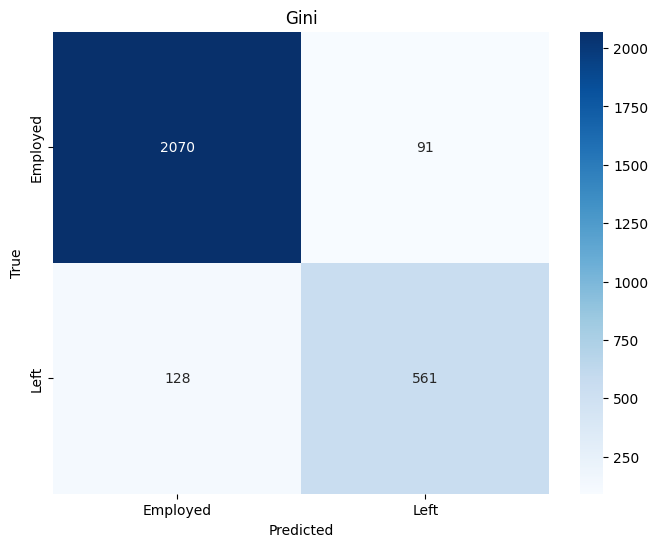

In [102]:
print("Model Evaluation - Gini Impurity")
print(f"Accuracy: {accuracy_gini:.2f}")
print(f"Precision: {precision_gini:.2f}")
print(f"Recall: {recall_gini:.2f}")
print(f"F1 Score: {f1_gini:.2f}")
print(f"Confusion Matrix: ")
labels=['Employed', 'Left']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gini')
plt.show()

Model Evaluation - Etropy
Accuracy: 0.93
Precision: 0.87
Recall: 0.83
F1 Score: 0.85
Confusion Matrix: 
Confusion Matrix: 


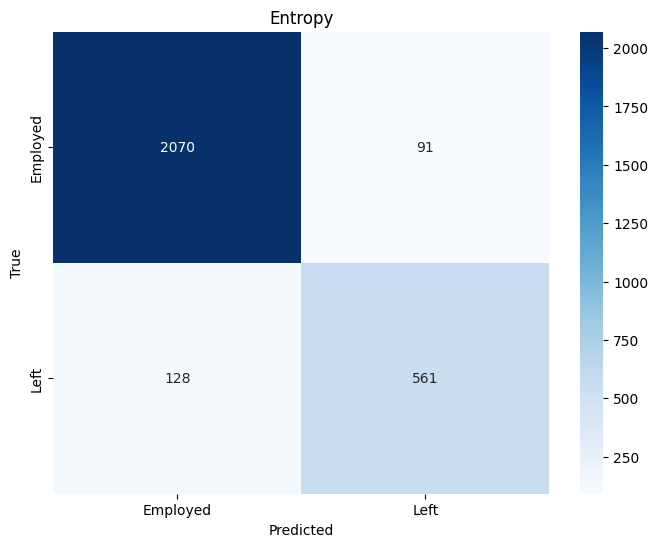

In [103]:
print("Model Evaluation - Etropy")
print(f"Accuracy: {accuracy_entropy:.2f}")
print(f"Precision: {precision_entorpy:.2f}")
print(f"Recall: {recall_entropy:.2f}")
print(f"F1 Score: {f1_entropy:.2f}")
print(f"Confusion Matrix: ")
print(f"Confusion Matrix: ")
labels=['Employed', 'Left']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Entropy')
plt.show()

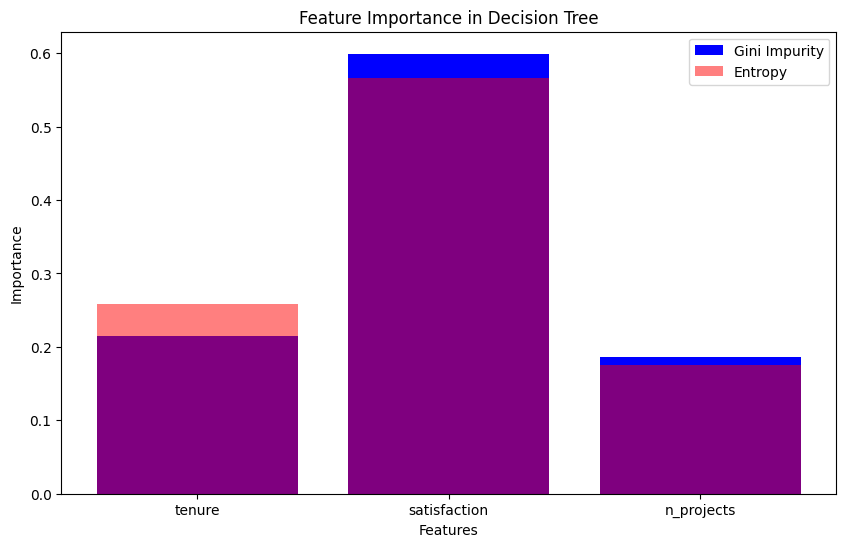

In [111]:
feature_importance_gini = clf_gini.feature_importances_
feature_importance_entropy = clf_entropy.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance_gini, label='Gini Impurity', color='blue')
plt.bar(X.columns, feature_importance_entropy, label='Entropy', alpha=0.5, color='red')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.legend()
plt.show()


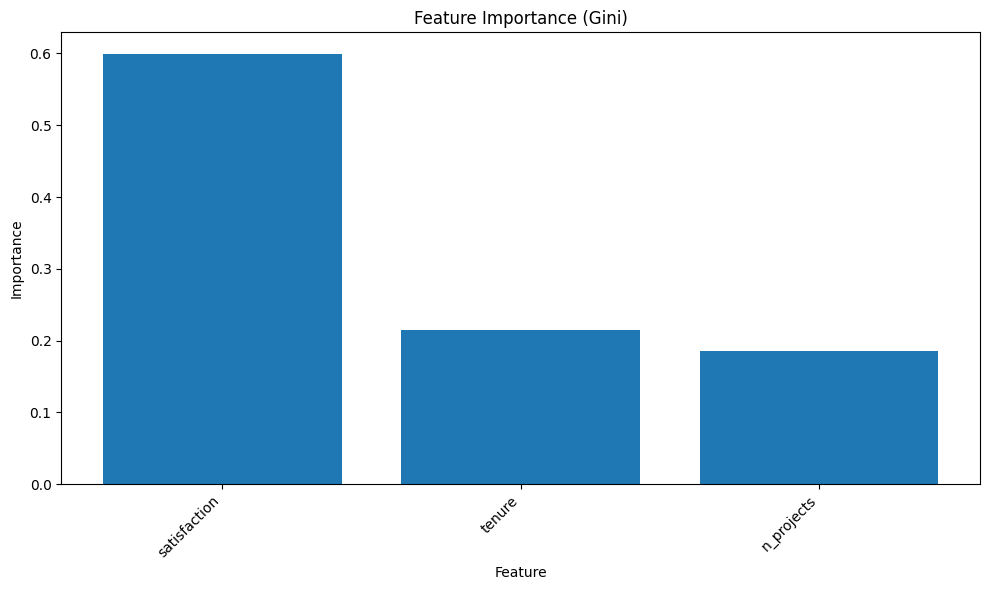

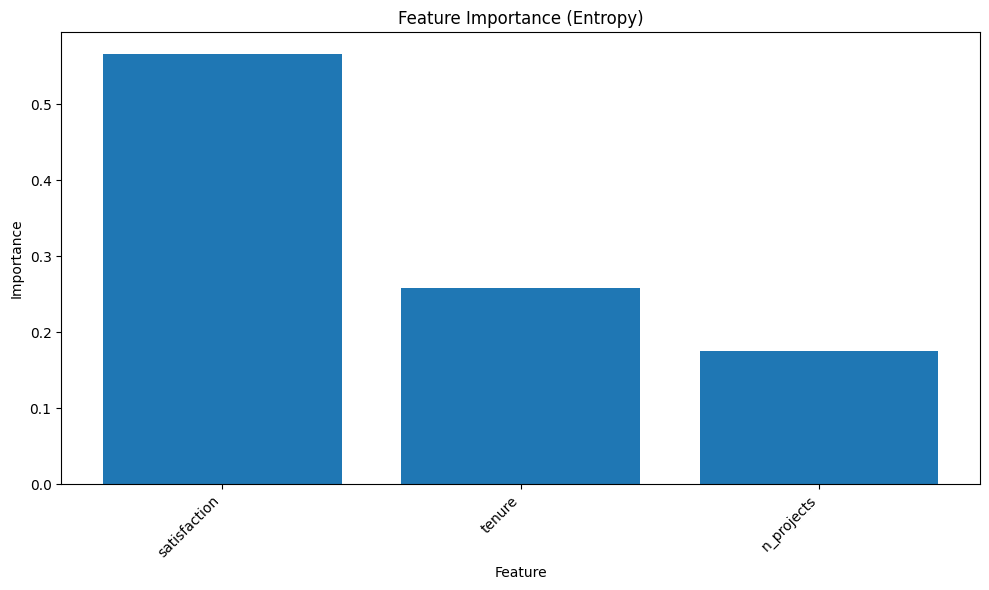

In [105]:
def plot_feature_importance(clf, criterion_label):
    feature_importances = clf.feature_importances_
    feature_names = X.columns
    sorted_indices = feature_importances.argsort()[::-1]  # Sort in descending order

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
    plt.title(f'Feature Importance ({criterion_label})')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

plot_feature_importance(clf_gini, 'Gini')
plot_feature_importance(clf_entropy, 'Entropy')
